In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("employment_data.csv")

In [3]:
data.head(5)

,Unnamed: 0,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor
0,0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990
1,1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230
2,2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100
3,3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590
4,4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230


In [4]:
for feature in data.columns:
    print(feature,data[feature].isnull().sum())

Unnamed: 0 0
year 0
population 0
labor_force 0
population_percent 0
employed_total 0
employed_percent 0
agrictulture_ratio 0
nonagriculture_ratio 0
unemployed 0
unemployed_percent 0
not_in_labor 0


**Outlier Detection**

In [5]:
def outlier_detection(feature):
    data.boxplot(column=feature)
    plt.show()

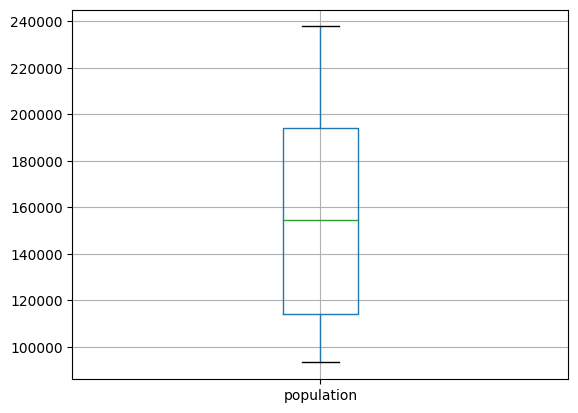

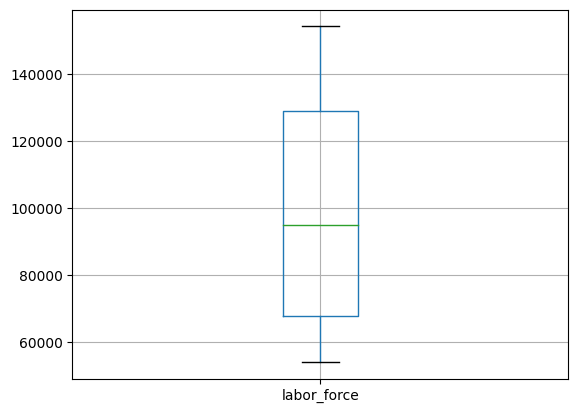

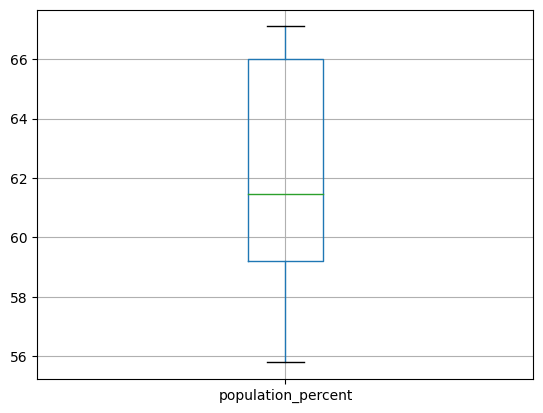

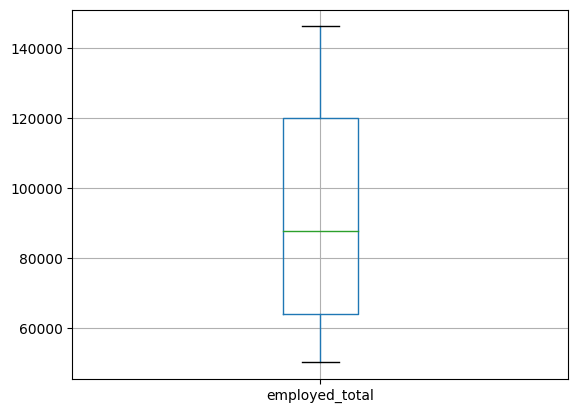

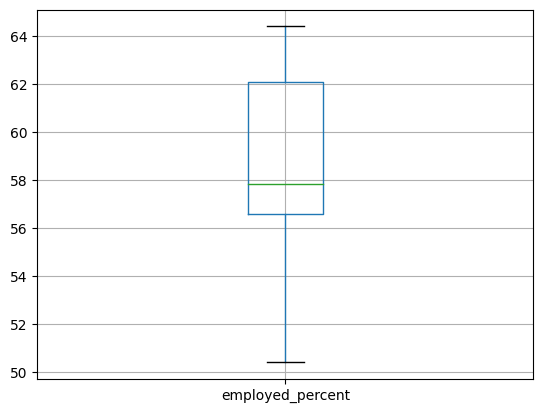

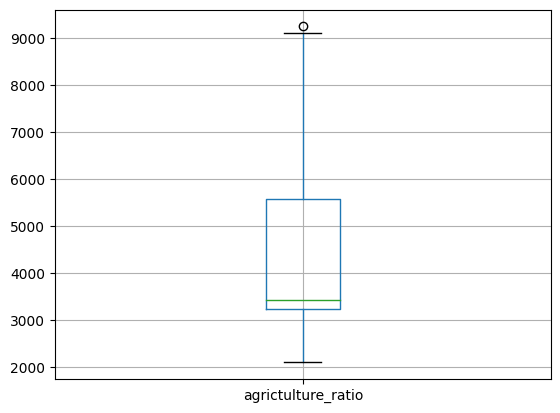

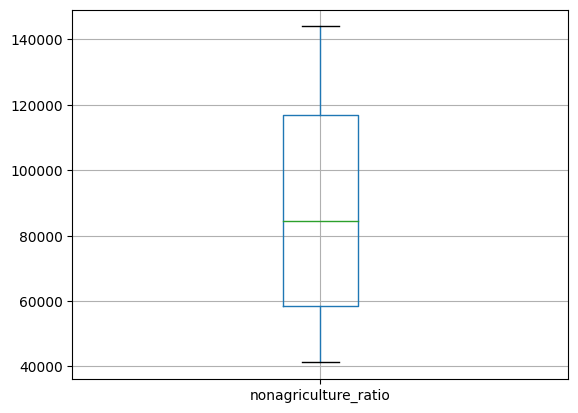

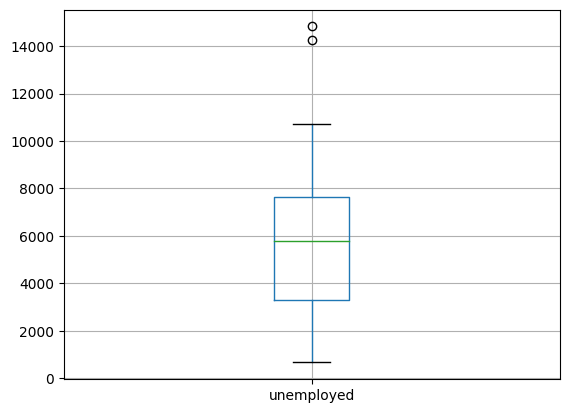

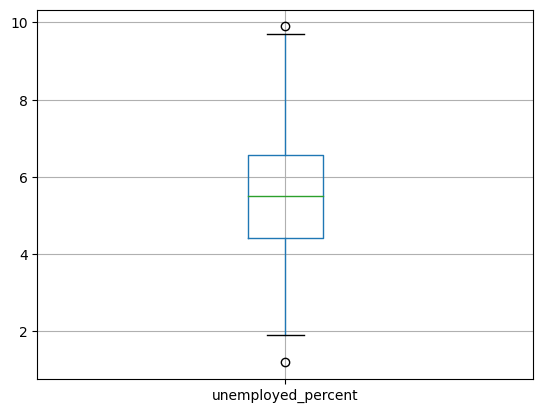

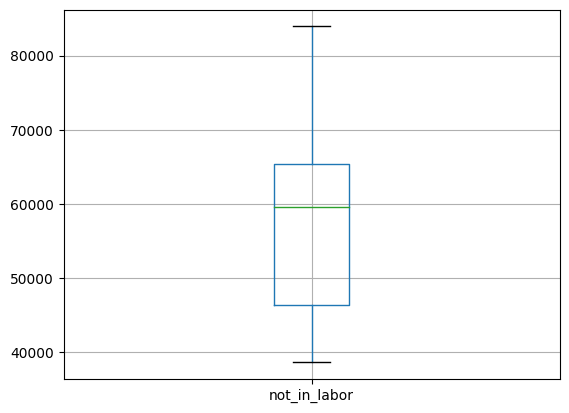

In [6]:
for feature in ['population', 'labor_force', 'population_percent',\
       'employed_total', 'employed_percent', 'agrictulture_ratio',\
       'nonagriculture_ratio', 'unemployed', 'unemployed_percent',\
       'not_in_labor']:
    outlier_detection(feature)

from the above boxplot we can observe that the only three features contains outliers


1.agriculture_ratio

2.unemployed

3.unemployed_percent

**Removing outliers from agrictulture_ratio**

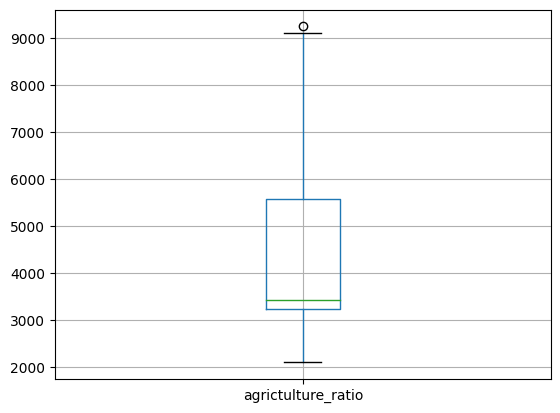

In [7]:
data.boxplot(column="agrictulture_ratio")
plt.show()

<ipython-input-8-83d81ff1e1d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= data["agrictulture_ratio"],kde=True,hist=False)


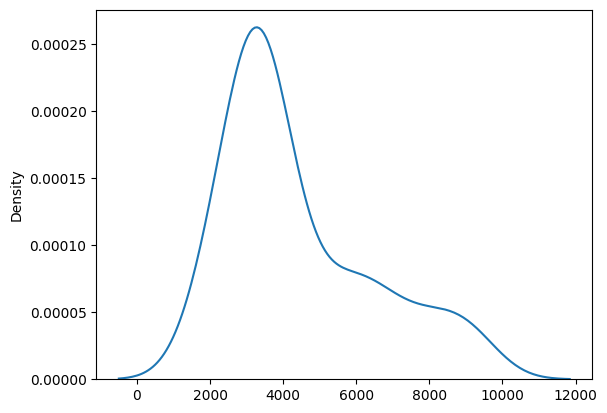

In [8]:
sns.distplot(x= data["agrictulture_ratio"],kde=True,hist=False)
plt.show()

In [9]:
data["agrictulture_ratio"].describe()

count      70.000000
mean     4402.214286
std      2018.489799
min      2095.000000
25%      3229.000000
50%      3424.500000
75%      5580.750000
max      9250.000000
Name: agrictulture_ratio, dtype: float64

In [10]:
IQR = data.agrictulture_ratio.quantile(0.75) - data.agrictulture_ratio.quantile(0.25)
IQR

2351.75

In [11]:
lower_boundry = data.agrictulture_ratio.quantile(0.25) - (IQR * 1.5)
upper_boundry = data.agrictulture_ratio.quantile(0.25) + (IQR * 1.5)
print(lower_boundry,"\n",upper_boundry)

-298.625 
 6756.625


In [12]:
data[data['agrictulture_ratio']>upper_boundry]

,Unnamed: 0,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor
0,0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990
1,1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230
2,2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100
3,3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590
4,4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230
5,5,1946,103070,57520,55.8,55250,53.6,8320,46930,2270,3.9,45550
6,6,1947,101827,59350,58.3,57038,56.0,7890,49148,2311,3.9,42477
7,7,1948,103068,60621,58.8,58343,56.6,7629,50714,2276,3.8,42447
8,8,1949,103994,61286,58.9,57651,55.4,7658,49993,3637,5.9,42708
9,9,1950,104995,62208,59.2,58918,56.1,7160,51758,3288,5.3,42787


In [13]:
data[data['agrictulture_ratio']<lower_boundry]

,Unnamed: 0,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor


In [14]:
df1 = data.copy()

In [15]:

data_no_outliers = df1.copy()
data_no_outliers.loc[data_no_outliers["agrictulture_ratio"] >= upper_boundry, "agrictulture_ratio"] = int(upper_boundry)
data_no_outliers.loc[data_no_outliers["agrictulture_ratio"] <= lower_boundry, "agrictulture_ratio"] = int(lower_boundry)


In [16]:
data_no_outliers.head()

,Unnamed: 0,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor
0,0,1941,99900,55910,56.0,50350,50.4,6756,41250,5560,9.9,43990
1,1,1942,98640,56410,57.2,53750,54.5,6756,44500,2660,4.7,42230
2,2,1943,94640,55540,58.7,54470,57.6,6756,45390,1070,1.9,39100
3,3,1944,93220,54630,58.6,53960,57.9,6756,45010,670,1.2,38590
4,4,1945,94090,53860,57.2,52820,56.1,6756,44240,1040,1.9,40230


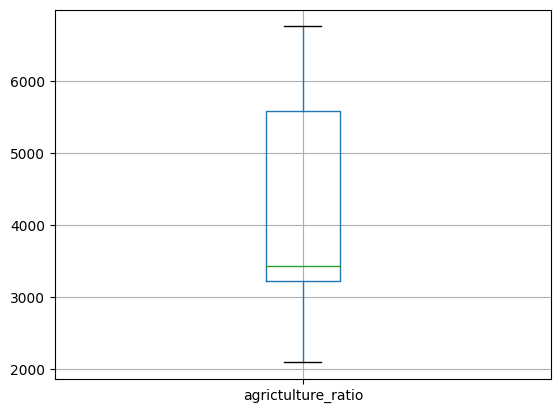

In [17]:
data_no_outliers.boxplot(column="agrictulture_ratio")
plt.show()

<ipython-input-18-51f53b17e020>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= data_no_outliers["agrictulture_ratio"],kde=True,hist=False)


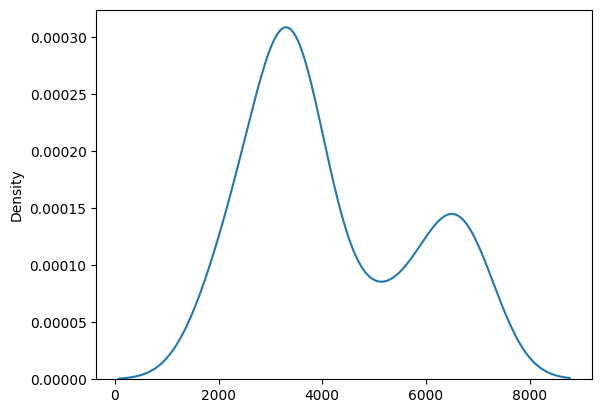

In [18]:
sns.distplot(x= data_no_outliers["agrictulture_ratio"],kde=True,hist=False)
plt.show()

**Removing outliers from feature unemployed**

In [19]:
df2 = data_no_outliers.copy()

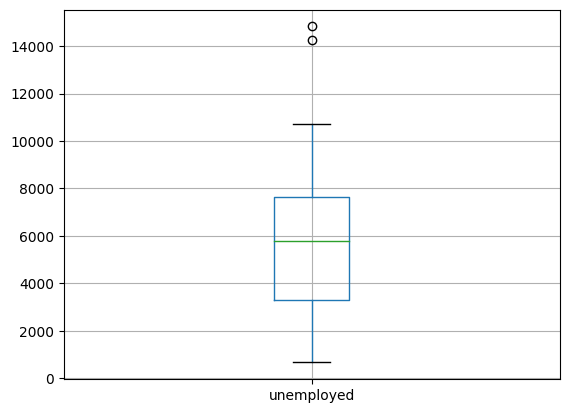

In [20]:
df2.boxplot(column="unemployed")
plt.show()

<ipython-input-21-01948baab733>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df2["unemployed"],kde=True,hist=False)


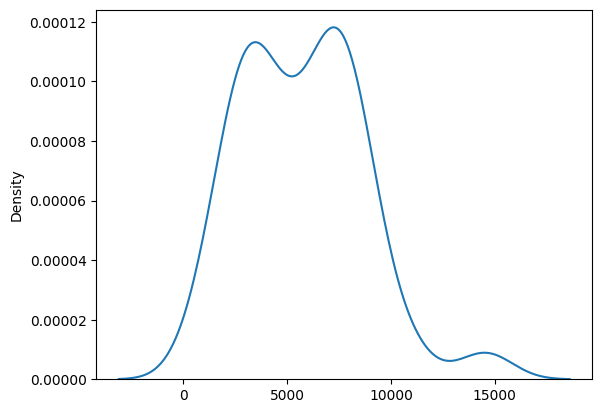

In [21]:
sns.distplot(x=df2["unemployed"],kde=True,hist=False)
plt.show()

In [22]:
  df2["unemployed"].describe()

count       70.000000
mean      5721.171429
std       2948.042136
min        670.000000
25%       3307.500000
50%       5786.000000
75%       7625.500000
max      14825.000000
Name: unemployed, dtype: float64

In [23]:
IQR = df2.unemployed.quantile(0.75) - df2.unemployed.quantile(0.25)
IQR

4318.0

In [24]:
upper_boundry = df2.unemployed.quantile(0.75) + (IQR * 1.5)
lower_boundry = df2.unemployed.quantile(0.25) - (IQR * 1.5)
print(upper_boundry,"\n",lower_boundry)

14102.5 
 -3169.5


In [25]:
new_data = df2.copy()

In [26]:
new_data.loc[new_data["unemployed"] >= upper_boundry, "unemployed"] = int(upper_boundry)
new_data.loc[new_data["unemployed"]<= lower_boundry,"unemployed"] = int(lower_boundry)

In [27]:
new_data.head()

,Unnamed: 0,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor
0,0,1941,99900,55910,56.0,50350,50.4,6756,41250,5560,9.9,43990
1,1,1942,98640,56410,57.2,53750,54.5,6756,44500,2660,4.7,42230
2,2,1943,94640,55540,58.7,54470,57.6,6756,45390,1070,1.9,39100
3,3,1944,93220,54630,58.6,53960,57.9,6756,45010,670,1.2,38590
4,4,1945,94090,53860,57.2,52820,56.1,6756,44240,1040,1.9,40230


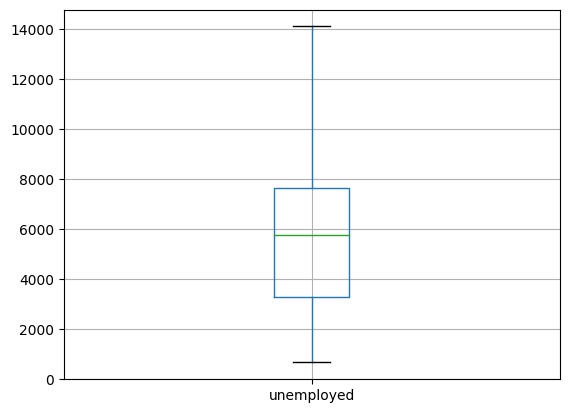

In [28]:
new_data.boxplot(column="unemployed")
plt.show()

<ipython-input-29-7430d901b364>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=new_data["unemployed"],kde=True,hist=False)


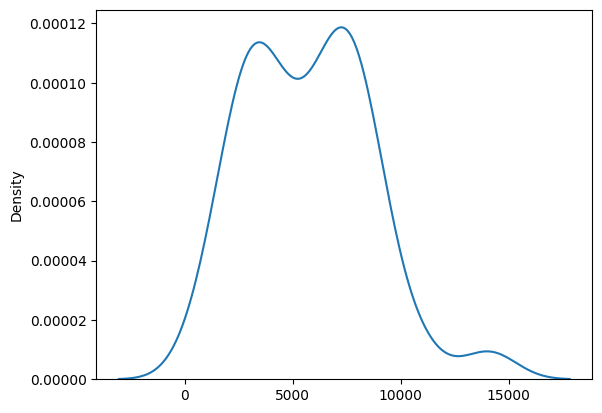

In [29]:
sns.distplot(x=new_data["unemployed"],kde=True,hist=False)
plt.show()

**Removing outliers from feature unemployed_feature**

In [30]:
df3 = new_data.copy()

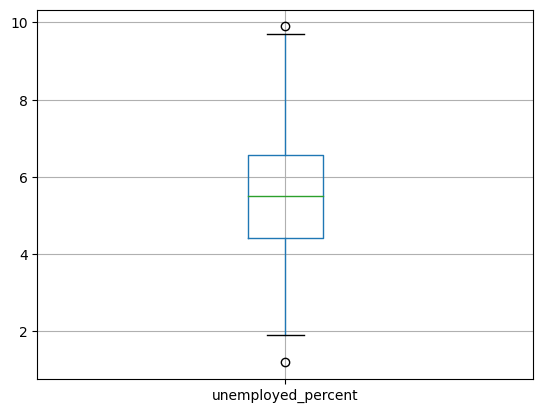

In [31]:
df3.boxplot(column="unemployed_percent")
plt.show()

<ipython-input-32-25c081efadea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df3["unemployed_percent"],kde=True,hist=False)


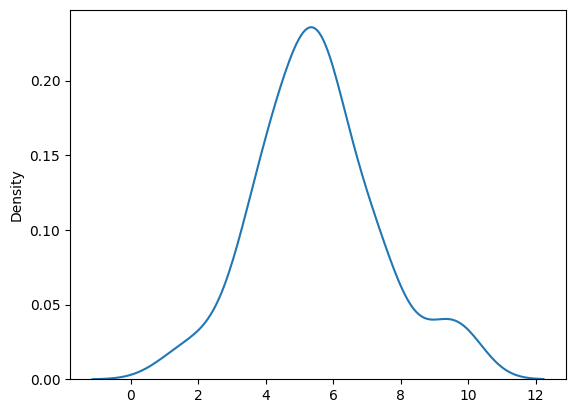

In [32]:
sns.distplot(x=df3["unemployed_percent"],kde=True,hist=False)
plt.show()

In [33]:
IQR = df3.unemployed_percent.quantile(0.75) - df3.unemployed_percent.quantile(0.25)
IQR

2.1499999999999995

In [34]:
upper_boundry = df3.unemployed_percent.quantile(0.75) + (IQR * 1.5)
lower_boundry = df3.unemployed_percent.quantile(0.25) - (IQR *1.5)
print(lower_boundry, "\n",upper_boundry)

1.2000000000000015 
 9.799999999999999


In [35]:
data_wo_outliers = df3.copy()
data_wo_outliers.loc[data_wo_outliers["unemployed_percent"] >= upper_boundry, "unemployed_percent"] = int(upper_boundry)
data_wo_outliers.loc[(data_wo_outliers["unemployed_percent"] <= lower_boundry) , "unemployed_percent"] = int(lower_boundry)


In [36]:
data_wo_outliers.head()

,Unnamed: 0,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor
0,0,1941,99900,55910,56.0,50350,50.4,6756,41250,5560,9.0,43990
1,1,1942,98640,56410,57.2,53750,54.5,6756,44500,2660,4.7,42230
2,2,1943,94640,55540,58.7,54470,57.6,6756,45390,1070,1.9,39100
3,3,1944,93220,54630,58.6,53960,57.9,6756,45010,670,1.0,38590
4,4,1945,94090,53860,57.2,52820,56.1,6756,44240,1040,1.9,40230


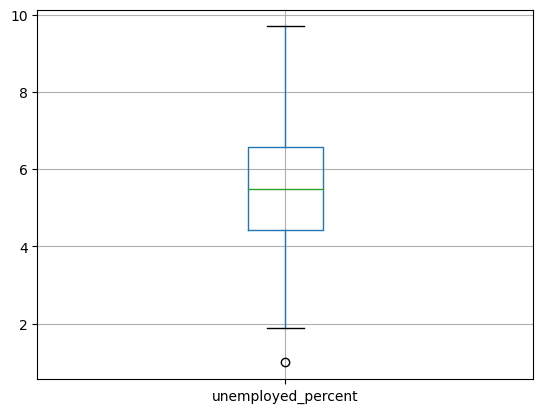

In [37]:
data_wo_outliers.boxplot(column="unemployed_percent")
plt.show()

<ipython-input-38-78046562daea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data_wo_outliers["unemployed_percent"],kde=True,hist=False)


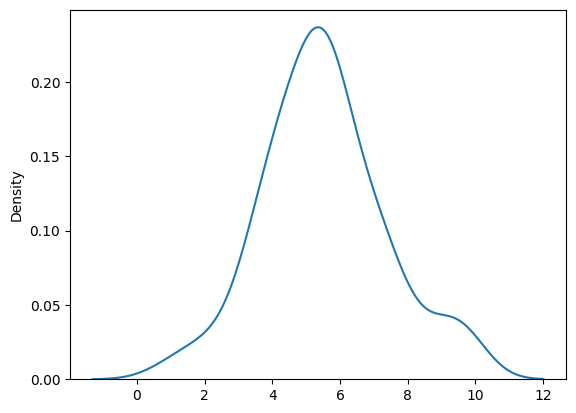

In [38]:
sns.distplot(x=data_wo_outliers["unemployed_percent"],kde=True,hist=False)
plt.show()

In [39]:
def outlier_detection(feature):
    data_wo_outliers.boxplot(column=feature)
    plt.show()

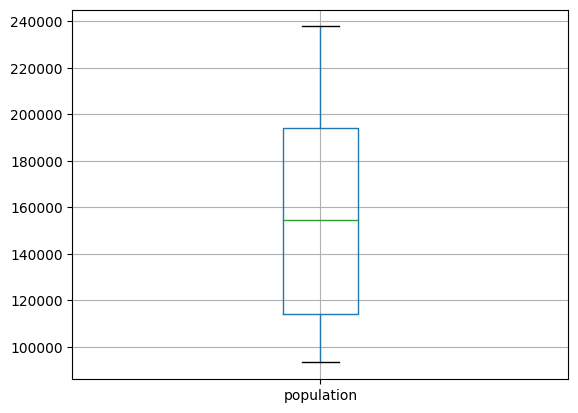

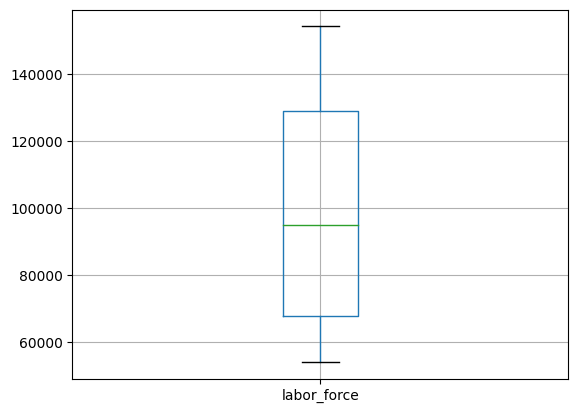

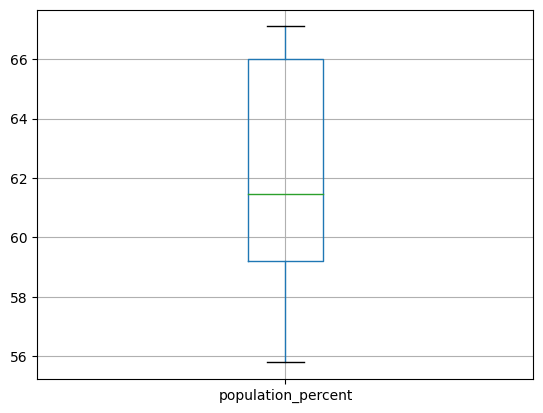

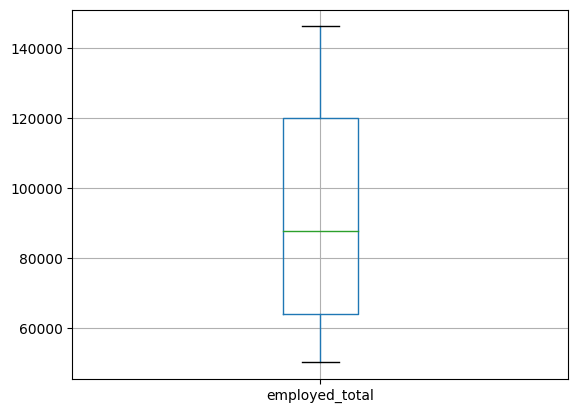

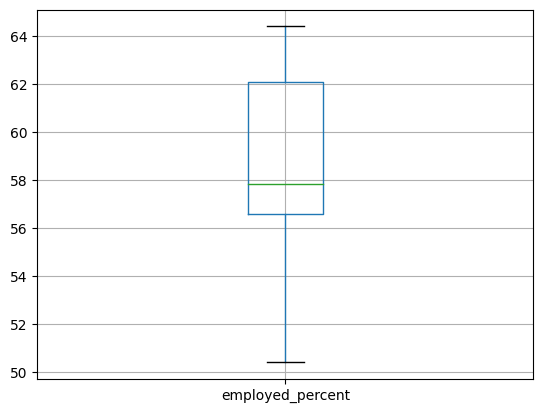

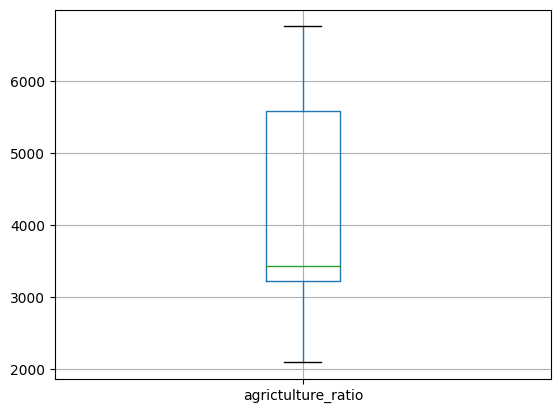

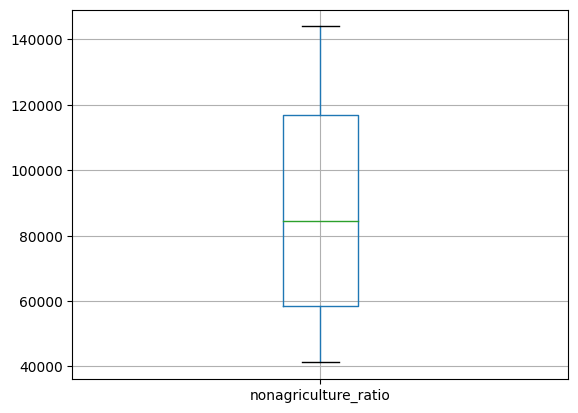

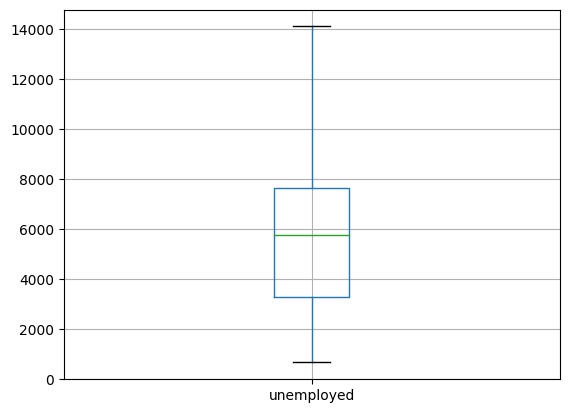

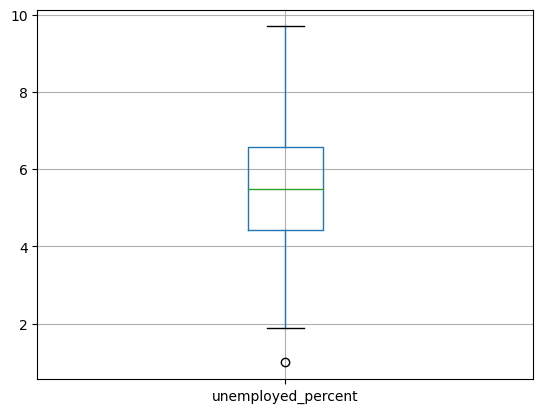

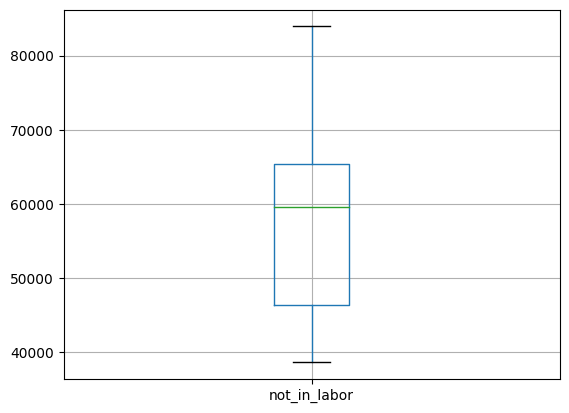

In [40]:
for feature in ['population', 'labor_force', 'population_percent',\
       'employed_total', 'employed_percent', 'agrictulture_ratio',\
       'nonagriculture_ratio', 'unemployed', 'unemployed_percent',\
       'not_in_labor']:
    outlier_detection(feature)

**Dataset after removing all the outliers **

In [41]:
data_wo_outliers.head()

,Unnamed: 0,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor
0,0,1941,99900,55910,56.0,50350,50.4,6756,41250,5560,9.0,43990
1,1,1942,98640,56410,57.2,53750,54.5,6756,44500,2660,4.7,42230
2,2,1943,94640,55540,58.7,54470,57.6,6756,45390,1070,1.9,39100
3,3,1944,93220,54630,58.6,53960,57.9,6756,45010,670,1.0,38590
4,4,1945,94090,53860,57.2,52820,56.1,6756,44240,1040,1.9,40230


In [42]:
dataset = data_wo_outliers.copy()

## feature scaling

In [43]:
dataset.head()

,Unnamed: 0,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor
0,0,1941,99900,55910,56.0,50350,50.4,6756,41250,5560,9.0,43990
1,1,1942,98640,56410,57.2,53750,54.5,6756,44500,2660,4.7,42230
2,2,1943,94640,55540,58.7,54470,57.6,6756,45390,1070,1.9,39100
3,3,1944,93220,54630,58.6,53960,57.9,6756,45010,670,1.0,38590
4,4,1945,94090,53860,57.2,52820,56.1,6756,44240,1040,1.9,40230


GAUSSIAN TRANSFORMATION

In [44]:
def plot_dist(feature):
  sns.kdeplot(dataset[feature],shade = True)
  plt.show()

<ipython-input-44-3bde08acf267>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[feature],shade = True)


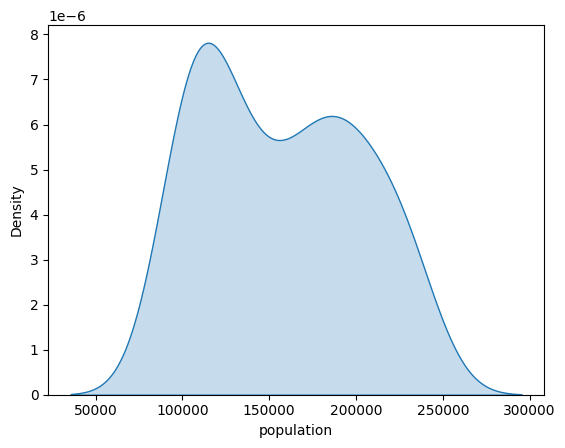

<ipython-input-44-3bde08acf267>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[feature],shade = True)


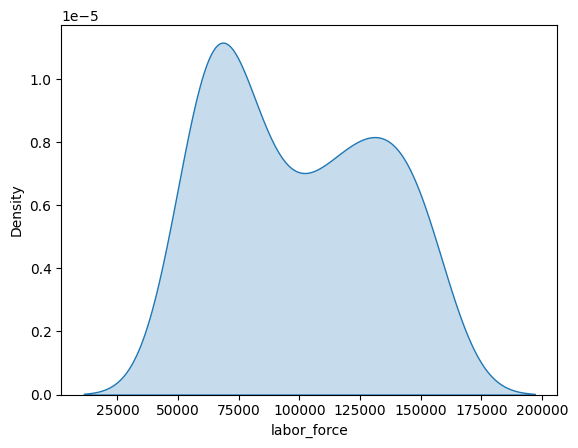

<ipython-input-44-3bde08acf267>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[feature],shade = True)


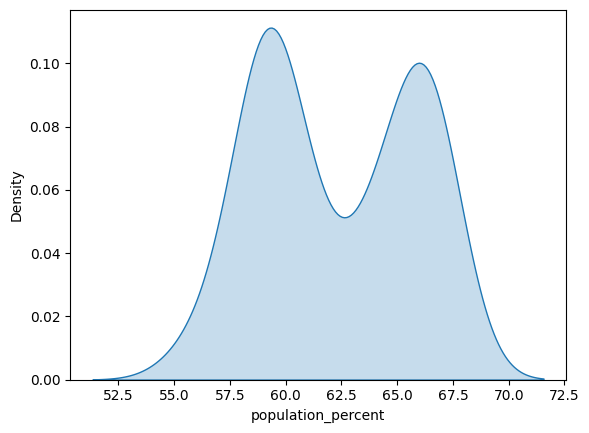

<ipython-input-44-3bde08acf267>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[feature],shade = True)


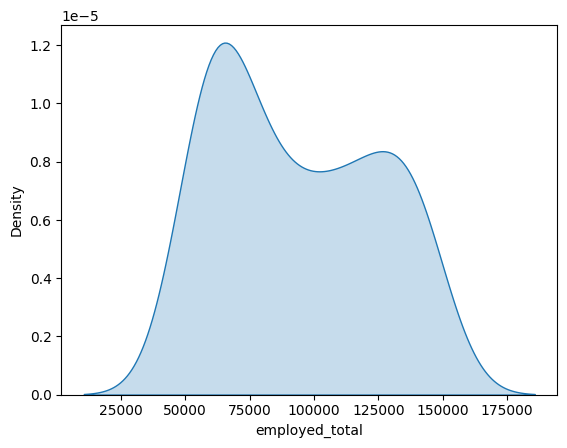

<ipython-input-44-3bde08acf267>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[feature],shade = True)


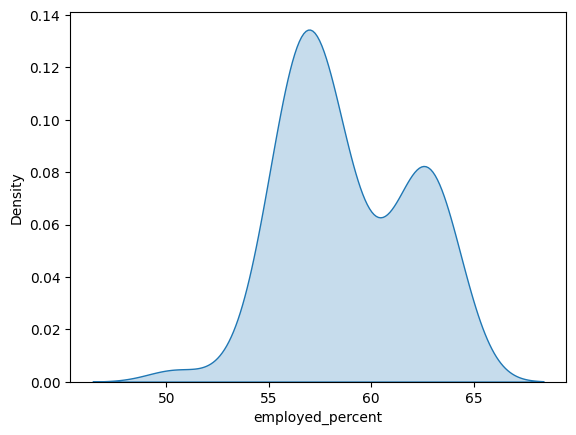

<ipython-input-44-3bde08acf267>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[feature],shade = True)


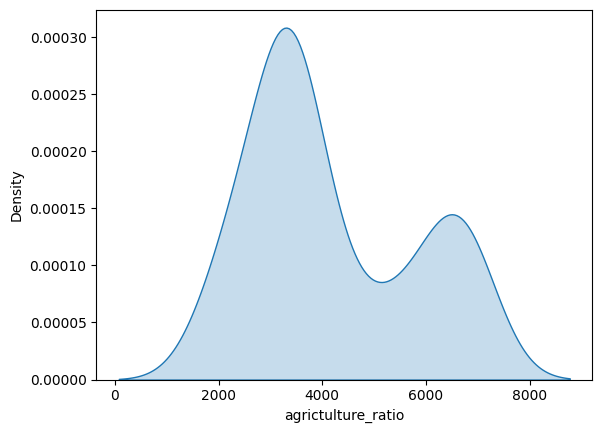

<ipython-input-44-3bde08acf267>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[feature],shade = True)


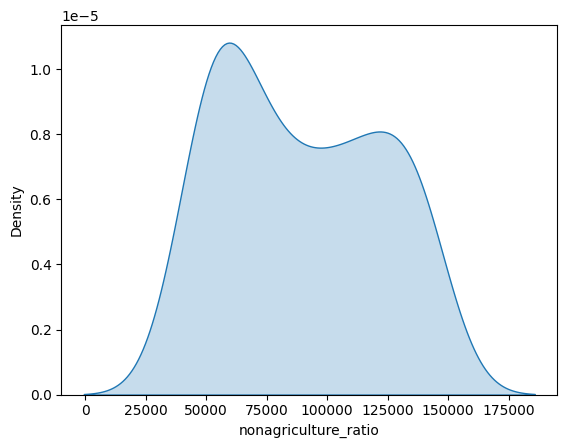

<ipython-input-44-3bde08acf267>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[feature],shade = True)


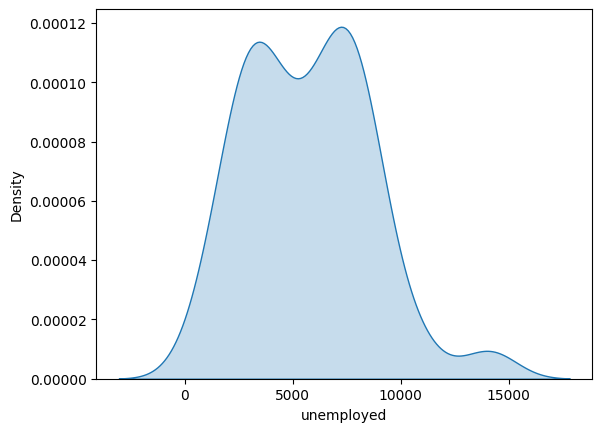

<ipython-input-44-3bde08acf267>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[feature],shade = True)


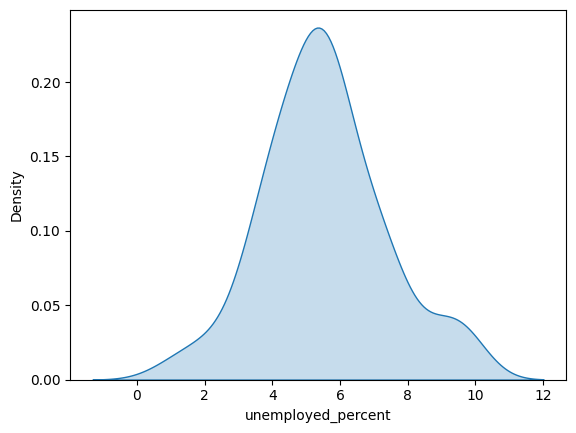

<ipython-input-44-3bde08acf267>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[feature],shade = True)


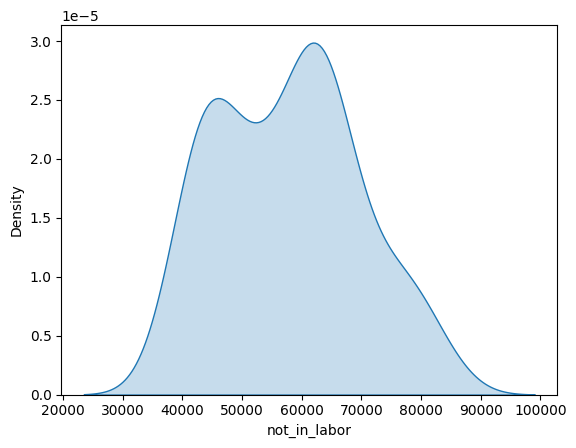

In [45]:
for feature in ['population', 'labor_force', 'population_percent',\
       'employed_total', 'employed_percent', 'agrictulture_ratio',\
       'nonagriculture_ratio', 'unemployed', 'unemployed_percent',\
       'not_in_labor']:
       plot_dist(feature)

In [46]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler=StandardScaler()

df_scaled=scaler.fit_transform(dataset)

In [49]:
df_scaled

array([[-1.70748147e+00, -1.70748147e+00, -1.28088765e+00,
        -1.31132080e+00, -1.82727808e+00, -1.40669205e+00,
        -2.72252329e+00,  1.65212485e+00, -1.47786738e+00,
        -5.14058502e-02,  1.94854524e+00, -1.17342155e+00],
       [-1.65798925e+00, -1.65798925e+00, -1.30915715e+00,
        -1.29619532e+00, -1.47969801e+00, -1.29594619e+00,
        -1.39907447e+00,  1.65212485e+00, -1.37756199e+00,
        -1.05519458e+00, -4.57164840e-01, -1.32370382e+00],
       [-1.60849703e+00, -1.60849703e+00, -1.39890161e+00,
        -1.32251366e+00, -1.04522293e+00, -1.27249412e+00,
        -3.98418042e-01,  1.65212485e+00, -1.35009375e+00,
        -1.60554771e+00, -2.02367373e+00, -1.59096718e+00],
       [-1.55900482e+00, -1.55900482e+00, -1.43076089e+00,
        -1.35004204e+00, -1.07418793e+00, -1.28910600e+00,
        -3.01580324e-01,  1.65212485e+00, -1.36182176e+00,
        -1.74400132e+00, -2.52719445e+00, -1.63451488e+00],
       [-1.50951260e+00, -1.50951260e+00, -1.4112414

In [55]:
def scaled_trans(feature):
  sns.kdeplot(df_scaled[:,feature],shade=True)
  plt.show()


<ipython-input-55-8f8951add4c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled[feature],shade=True)


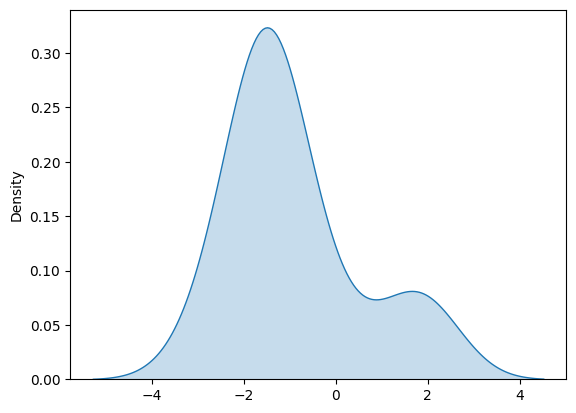

<ipython-input-55-8f8951add4c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled[feature],shade=True)


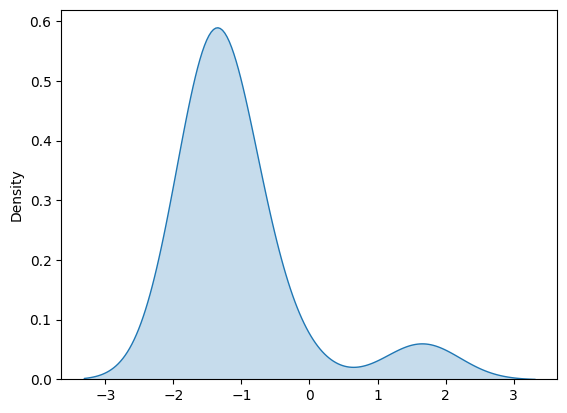

<ipython-input-55-8f8951add4c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled[feature],shade=True)


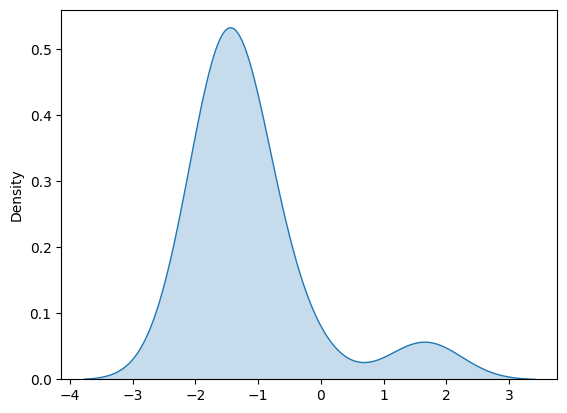

<ipython-input-55-8f8951add4c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled[feature],shade=True)


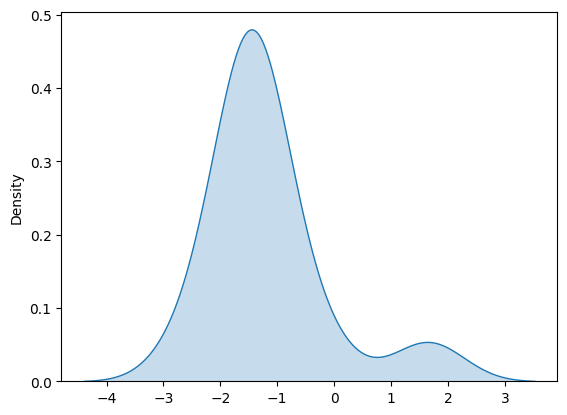

<ipython-input-55-8f8951add4c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled[feature],shade=True)


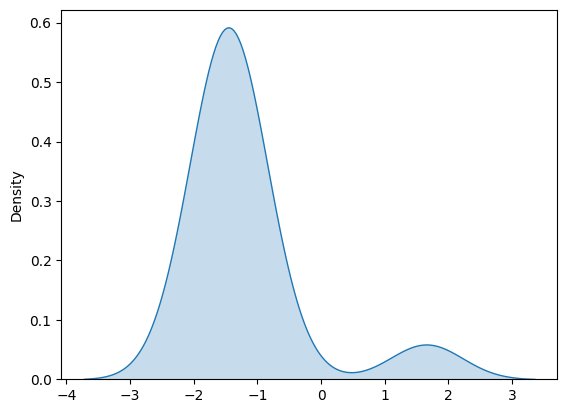

<ipython-input-55-8f8951add4c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled[feature],shade=True)


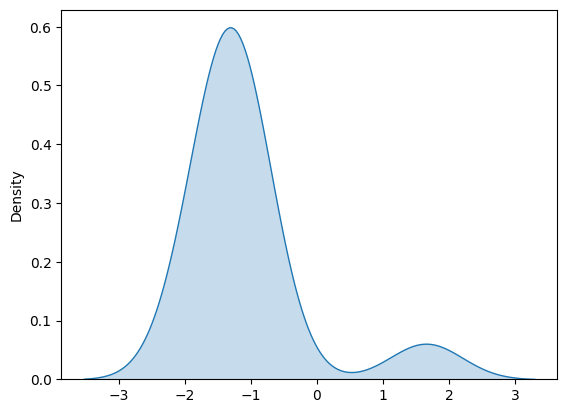

<ipython-input-55-8f8951add4c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled[feature],shade=True)


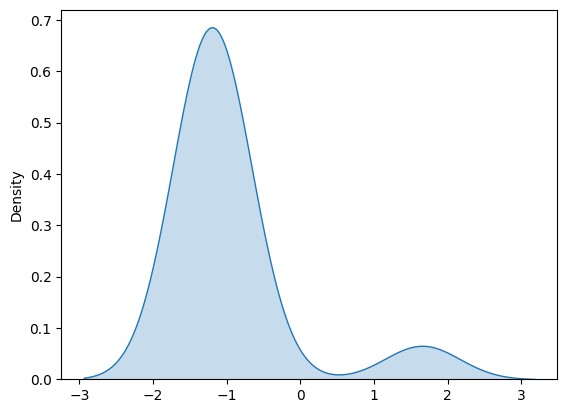

<ipython-input-55-8f8951add4c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled[feature],shade=True)


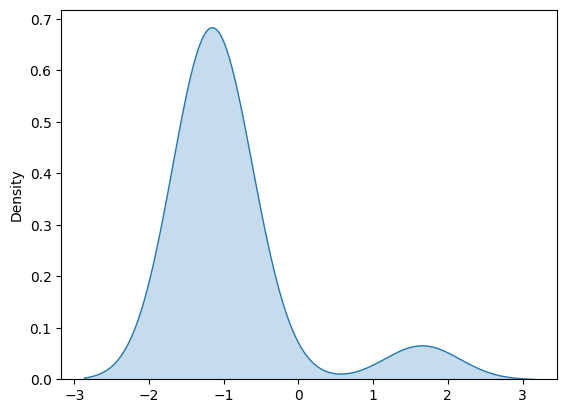

<ipython-input-55-8f8951add4c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled[feature],shade=True)


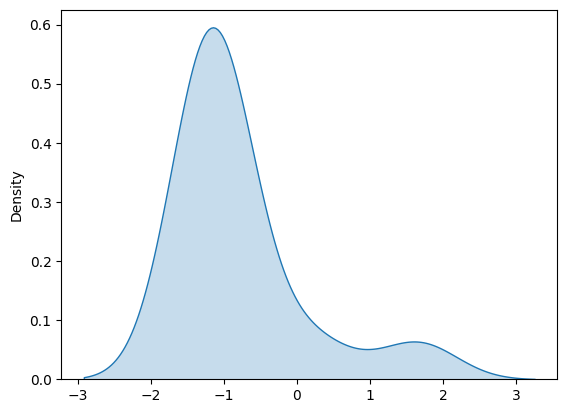

<ipython-input-55-8f8951add4c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled[feature],shade=True)


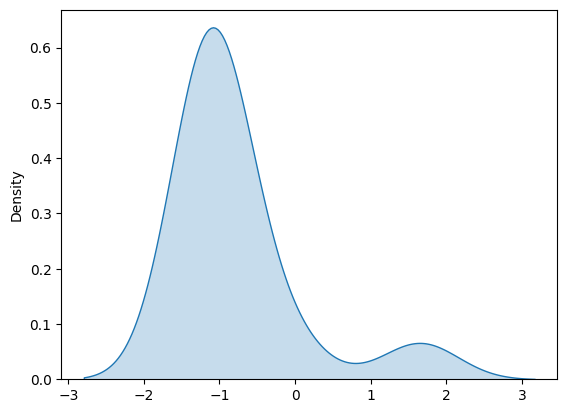

<ipython-input-55-8f8951add4c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled[feature],shade=True)


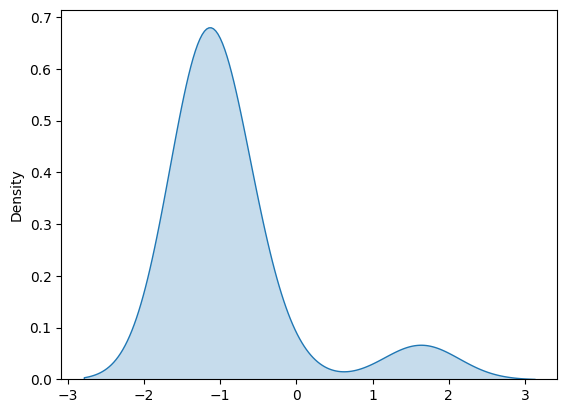

<ipython-input-55-8f8951add4c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled[feature],shade=True)


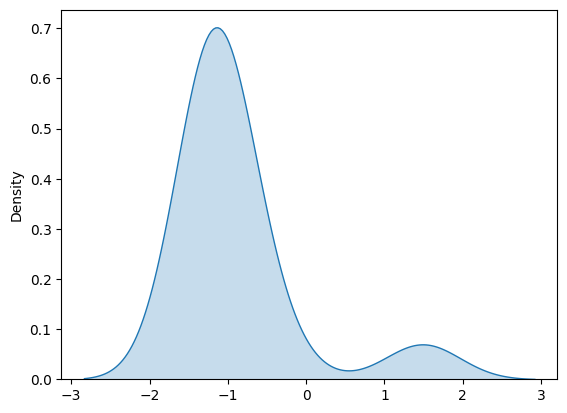

In [59]:
for feature in range(len(dataset.columns)):
       scaled_trans(feature)